# Superbowl Splurge: Forecasting Walmart sales
### Patricio Hernandez Senosiain
---

## Contents

> [1 - Introduction](#1---Introduction)
> 
> [2 - Importing dependencies](#2---Importing-dependencies)
> 
> [3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
> 
> [4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
> 
> [5 - Modelling](#5---Modelling)
> 
> [6 - Final predictions and submission](#6---Final-predictions-and-submission)


## 1 - Introduction

## 2 - Importing dependencies

In [1]:
# Importing libraries and modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted')) 
    

## 3 - Data retrieval and exploratory analysis


> [3.1 - Data retrieval](#3.1---Data-retrieval)
> 
> [3.2 - General overview](#3.2---General-overview)
> 
> [3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable)
> 
> [3.4 - Distribution of features](#3.4---Distribution-of-features)
>
> [3.5 - Bivariate analysis of numerical features](#3.5---Bivariate-analysis-of-numerical-features)
> 
> [3.6 - Correlation between features](#3.6---Correlation-between-features)
> 
> [3.7 - Overview of missing values](#3.7---Overview-of-missing-values)
> 

### 3.1 - Data retrieval

In [2]:

# Retrieving datasets
stores = pd.read_csv('data/stores.csv')
features = pd.read_csv('data/features.csv')
train = pd.read_csv('data/train.csv')


### 3.2 - General overview

In [3]:
stores.info()
print('-'*30)
features.info()
print('-'*30)
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemploym

In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
features.head() 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:

# Merging datasets
data = train.merge(features, how='left', on=['Store', 'Date'])
data = data.merge(stores, how='left', on='Store' )
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [8]:
data.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### 3.4 - Distribution of target variable

In [9]:
target = train.pivot_table(values='Weekly_Sales',
                           index='Date',
                           columns=['Store', 'Dept'])
target.index = pd.to_datetime(target.index)
target.head()

Store             1                                                    \
Dept              1         2         3         4         5        6    
Date                                                                    
2010-02-05  24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
2010-02-12  46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
2010-02-19  41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   
2010-02-26  19403.54  44292.87  11135.17  34660.16  24101.89  5244.56   
2010-03-05  21827.90  48397.98  12275.58  38086.19  23082.14  4221.25   

Store                                               ...       45            \
Dept              7         8         9         10  ...       87        90   
Date                                                ...                      
2010-02-05  21084.08  40129.01  16930.99  30721.50  ...  8818.12  32016.42   
2010-02-12  18310.31  37334.83  16562.49  31494.77  ...  5895.61  19724.40   
2010-02-19  19985.20  38717.60  15880.85  29634.13  ...  8004.58  23280.08   
2010-02-26  17224.22  35318.20  15175.52  27921.96  ...  6803.61  25421.33   
2010-03-05  19659.70  38776.09  24064.70  33299.27  ...  7577.89  22653.30   

Store                                                                          
Dept              91        92       93     94        95  96       97      98  
Date                                                                           
2010-02-05  22708.11  68203.08  4002.34    NaN  63833.63 NaN  8393.22  347.23  
2010-02-12  13860.64  44898.91  2665.98   2.94  41131.42 NaN  5011.36  553.25  
2010-02-19  16650.13  52417.82  2273.04  10.00  47214.80 NaN  5703.42  281.00  
2010-02-26  17557.56  53780.81  2188.80   5.88  49982.50 NaN  6343.60    2.50  
2010-03-05  16332.01  49663.66  2188.18   8.82  48006.18 NaN  5445.80    4.50  

[5 rows x 3331 columns]

ValueError: If using all scalar values, you must pass an index

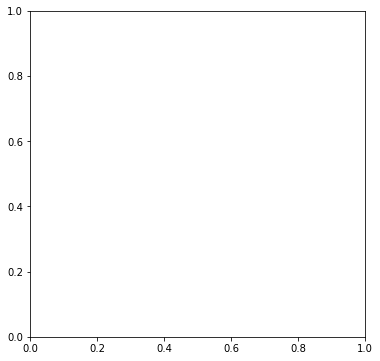

In [10]:
# Plotting department sales distribution
f, axs = plt.subplots(figsize=(6, 6))
sns.kdeplot(target, color=standard_palette[0], fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of Weekly Department Sales', size=16)
plt.show()

In [ ]:
# Plotting distribution of values for target variable
f, axs = plt.subplots(figsize=(6, 6))
sns.kdeplot(target, color=standard_palette[0], fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of Weekly Sales', size=16)
plt.show()

In [ ]:
# Plotting distribution of values for target variable
f, axs = plt.subplots(3, 15)
for 
sns.kdeplot(target, color=standard_palette[0], fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of Weekly Sales by store', size=16)
plt.show()

#### **NOTES FROM (3.4):**

* No missing values for `Weekly_Sales`
* Distribution of house prices is significantly skewed

#### **OBSERVATIONS:**
* `Weekly_Sales` data should be log-transformed to reduce skew (benefits regression models)
* After fitting a model with log-tranformed `Weekly_Sales` predictions should be inversely transformed


Plots:
Time series (weekly sales vs time, target variable analysis)
- each department for each store (all together)


### 3.5 - Total Sales by Store distribution

### 3.5 - Total Sales by Store series with flags

### 3.5 - Total Sales by Store

### 3.5 - Total Sales by Store

## 4 - Data cleaning and preprocessing

## 5 - Modelling

## 6 - Final predictions and submission